In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
import glob
import numpy as np
import cv2

In [ ]:
# Read images for resizing
# train_images = sorted(glob.glob('/home/sayan/datasets/fastai/flowers/train/*/*.jpg'))
# print('No. of train images: ',len(train_images))
# val_images = sorted(glob.glob('/home/sayan/datasets/fastai/flowers/valid/*/*.jpg'))
# print('No. of train images: ',len(val_images))

In [ ]:
#  Resize train images to 240x240x3
# for t in train_images:
#     print('Doing image: ', t)
#     img = cv2.imread(t, 1)
#     dst = cv2.resize(img, (240, 240), interpolation=cv2.INTER_LANCZOS4)
#     print(dst.shape)
#     cv2.imwrite(t, dst)
#     print('\n\n')

In [ ]:
# Resize validation images to 240x240x3
# for t in val_images:
#     print('Doing image: ', t)
#     img = cv2.imread(t, 1)
#     dst = cv2.resize(img, (240, 240), interpolation=cv2.INTER_LANCZOS4)
#     print(dst.shape)
#     cv2.imwrite(t, dst)
#     print('\n\n')

In [5]:
PATH = "/home/sayan/datasets/fastai/flowers/"
sz = 240

In [6]:
torch.cuda.is_available()

True

In [7]:
torch.backends.cudnn.enabled

True

In [8]:
os.listdir(PATH)

['tmp', 'valid', 'models', 'train']

In [9]:
os.listdir(f'{PATH}valid')

['sunflower', 'dandelion', 'tulip', 'rose', 'daisy']

In [10]:
files = os.listdir(f'{PATH}valid/rose')[:5]
files

['22093190909_77223e6f53_n.jpg',
 '33568345265_e4f7d0fe45_n.jpg',
 '18563353954_b761d97155_m.jpg',
 '18302780950_9469703544_n.jpg',
 '18486151112_6f83e92223_n.jpg']

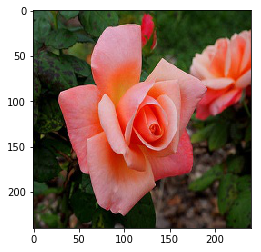

In [11]:
img = plt.imread(f'{PATH}valid/rose/{files[0]}')
plt.imshow(img);

In [12]:
img.shape

(240, 240, 3)

In [13]:
img[:4,:4]

array([[[58, 83, 53],
        [59, 85, 56],
        [56, 89, 60],
        [55, 91, 65]],

       [[51, 76, 47],
        [52, 81, 53],
        [52, 85, 58],
        [52, 88, 62]],

       [[48, 74, 47],
        [51, 79, 54],
        [52, 84, 60],
        [51, 86, 62]],

       [[56, 81, 59],
        [59, 87, 64],
        [58, 92, 68],
        [55, 93, 70]]], dtype=uint8)

In [17]:
arch=resnet50
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 40)

epoch      trn_loss   val_loss   accuracy                  
    0      0.498666   0.528689   0.795069  
    1      0.324653   0.500051   0.827427                  
    2      0.23882    0.530205   0.825886                  
    3      0.189499   0.541352   0.824345                  
    4      0.159445   0.555857   0.808937                  
    5      0.142952   0.535367   0.818182                  
    6      0.12007    0.564861   0.810478                  
    7      0.101903   0.562631   0.819723                  
    8      0.088251   0.577333   0.828968                   
    9      0.081717   0.584963   0.825886                   
    10     0.078857   0.567154   0.827427                   
    11     0.067277   0.604751   0.818182                   
    12     0.064148   0.596602   0.821263                   
    13     0.053778   0.624068   0.819723                   
    14     0.053315   0.646376   0.819723                   
    15     0.048686   0.621302   0.822804        

[array([0.75547]), 0.821263482464113]

In [18]:
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 

In [99]:
data.classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [98]:
log_preds= learn.predict()
y = data.val_y
log_preds.shape

(649, 5)

In [100]:
num_classes = len(data.classes)
preds = np.argmax(log_preds, axis=1)
probs = np.exp(log_preds)

In [101]:
# the following functions have an extra parameter - y which is the selected_class between (0,num_classes-1)
# y is a number in the case of displaying the most correct/incorrect classes 
# y is a vector in the case of displaying the most uncertain classes
def plot_val_with_title(idxs, title, y):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])    
    if type(y) == int: title_probs = [probs[x,y] for x in idxs]
    else:    
        key = 0;
        for x in idxs:
            title_probs = [probs[x,y[key]] for x in idxs]
            key += 1
    
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [102]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [103]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

In [104]:
def most_by_mask(mask, y, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs,y])[:4]]

In [105]:
# Here the mult=-1 when the is_correct flag is true -> that means that when we want to display the most correct classes we will make a descending sorting (argsort) because we want that the biggest probabilities to be displayed first. 
# When is_correct is false, we want to display the most incorrect classes, so we want an ascending sorting since our interest is in the smallest probabilities.

def most_by_correct(y, is_correct): 
    mult = -1 if is_correct==True else 1
    return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), y, mult)

Most uncertain predictions


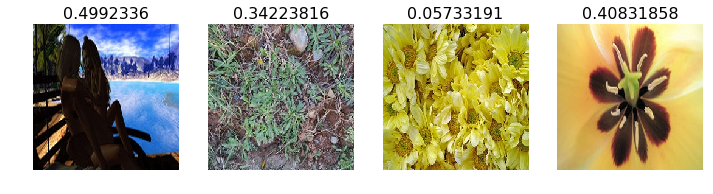

In [27]:
most_uncertain = np.argsort(np.average(np.abs(probs-(1/num_classes)), axis = 1))[:4]
idxs_col = np.argsort(np.abs(probs[most_uncertain,:]-(1/num_classes)))[:4,-1]
plot_val_with_title(most_uncertain, "Most uncertain predictions", idxs_col)

Most correct class daisy


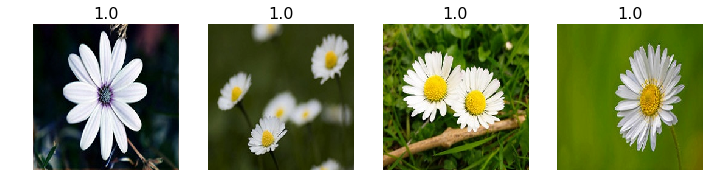

In [28]:
# for most correct classes with label 0
label = 0
plot_val_with_title(most_by_correct(label, True), "Most correct class daisy", label)

Most correct class dandelion


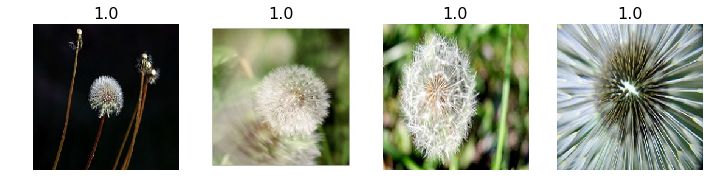

In [29]:
# for most correct classes with label 1
label = 1
plot_val_with_title(most_by_correct(label, True), "Most correct class dandelion", label)

Most correct class rose


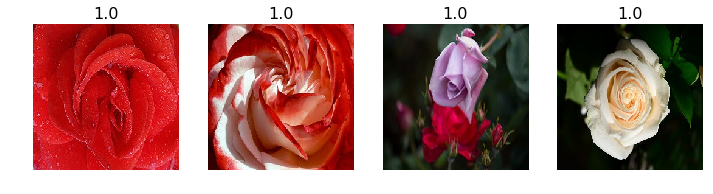

In [30]:
# for most correct classes with label 2
label = 2
plot_val_with_title(most_by_correct(label, True), "Most correct class rose", label)

Most correct class sunflower


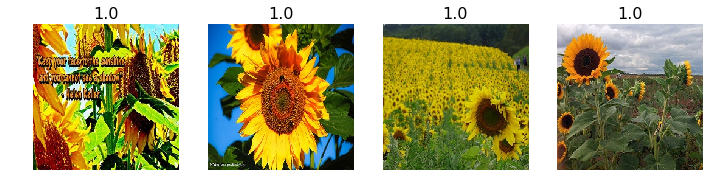

In [31]:
# for most correct classes with label 3
label = 3
plot_val_with_title(most_by_correct(label, True), "Most correct class sunflower", label)

Most correct class tulip


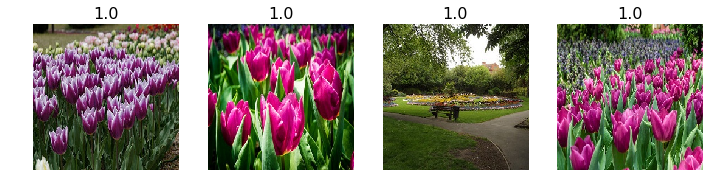

In [32]:
# for most correct classes with label 4
label = 4
plot_val_with_title(most_by_correct(label, True), "Most correct class tulip", label)

Most incorrect class daisy


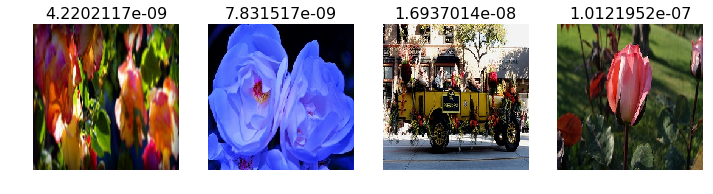

In [33]:
# for most incorrect classes with label 0
label = 0
plot_val_with_title(most_by_correct(label, False), "Most incorrect class daisy", label)

Most incorrect class dandelion


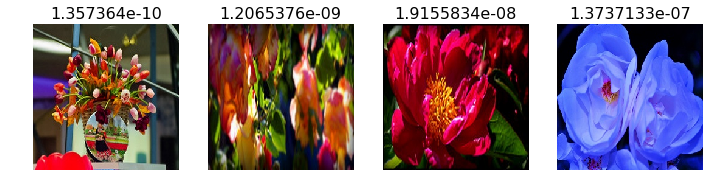

In [34]:
# for most incorrect classes with label 1
label = 1
plot_val_with_title(most_by_correct(label, False), "Most incorrect class dandelion", label)

Most incorrect class rose


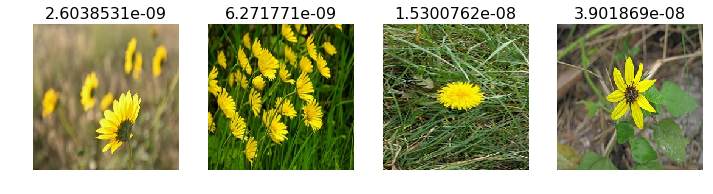

In [35]:
# for most incorrect classes with label 2
label = 2
plot_val_with_title(most_by_correct(label, False), "Most incorrect class rose", label)

Most incorrect class sunflower


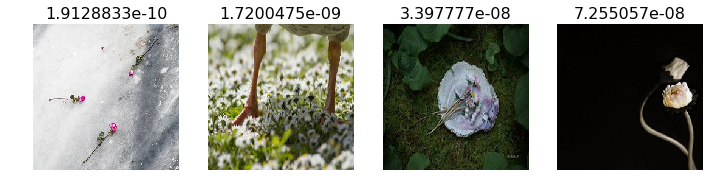

In [36]:
# for most incorrect classes with label 3
label = 3
plot_val_with_title(most_by_correct(label, False), "Most incorrect class sunflower", label)

Most incorrect class tulip


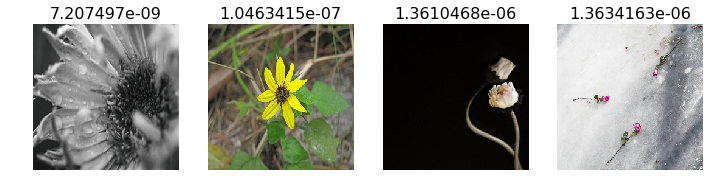

In [37]:
# for most incorrect classes with label 4
label = 4
plot_val_with_title(most_by_correct(label, False), "Most incorrect class tulip", label)

In [38]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [39]:
lrf=learn.lr_find()
print(lrf)

 57%|█████▋    | 33/58 [00:00<00:00, 68.08it/s, loss=7.03]
None                                                      


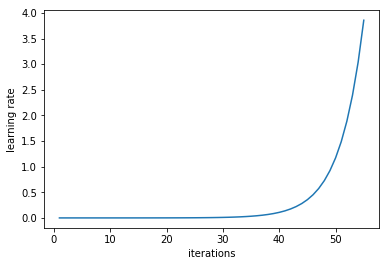

In [40]:
learn.sched.plot_lr()

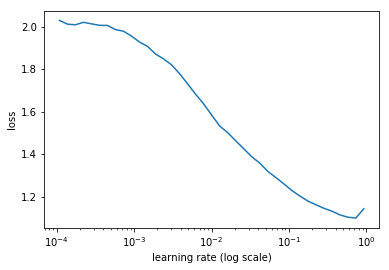

In [41]:
learn.sched.plot()

In [61]:
tfms = tfms_from_model(resnet50, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [62]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=4)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [63]:
ims = np.stack([get_augs() for i in range(6)])

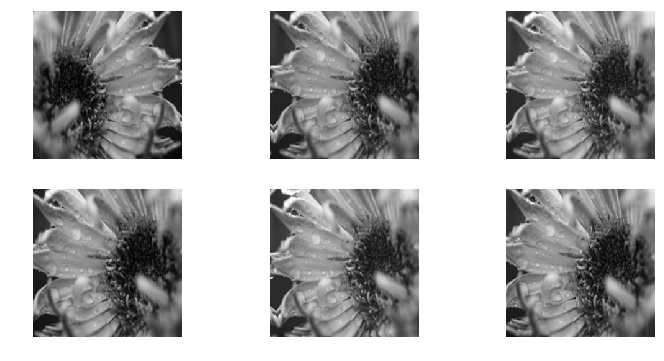

In [64]:
plots(ims, rows=2)

In [65]:
arch=resnet50
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [66]:
learn.fit(1e-1, 40)

epoch      trn_loss   val_loss   accuracy                  
    0      0.67585    0.875187   0.784284  
    1      0.492547   0.930883   0.790447                  
    2      0.333805   0.805434   0.779661                  
    3      0.237594   0.73075    0.813559                  
    4      0.184087   0.785693   0.805855                  
    5      0.157296   0.851115   0.804314                  
    6      0.133968   0.898069   0.785824                  
    7      0.102926   0.855097   0.813559                   
    8      0.094445   0.922228   0.821263                   
    9      0.088539   0.888401   0.810478                   
    10     0.076789   0.899662   0.822804                   
    11     0.087202   0.747878   0.827427                   
    12     0.067065   0.763192   0.824345                   
    13     0.057916   0.797218   0.835131                   
    14     0.067276   1.040856   0.805855                   
    15     0.054148   0.89851    0.816641       

[array([0.99841]), 0.8366718028653385]

In [67]:
learn.precompute=False

In [68]:
learn.fit(1e-2, 4, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.119804   1.043724   0.83359   
    1      0.115176   1.030401   0.828968                  
    2      0.10848    1.008884   0.825886                   
    3      0.10139    1.05084    0.827427                  



[array([1.05084]), 0.827426810477658]

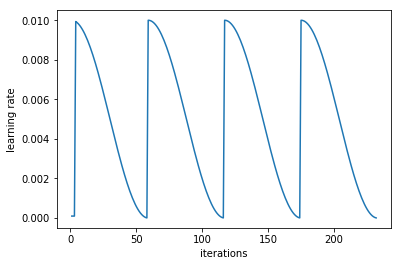

In [69]:
learn.sched.plot_lr()

In [70]:
learn.save('res50_flower_lastlayer')

In [71]:
learn.load('res50_flower_lastlayer')

In [72]:
learn.unfreeze()

In [73]:
lr=np.array([1e-4,1e-3,1e-2])

In [74]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.290979   1.003811   0.822804  
    1      0.202575   0.911401   0.83359                   
    2      0.126449   0.982477   0.827427                  
    3      0.094385   0.962545   0.838213                   
    4      0.068939   0.869288   0.853621                   
    5      0.047493   0.942257   0.839753                   
    6      0.043447   0.895824   0.844376                   



[array([0.89582]), 0.8443759631118716]

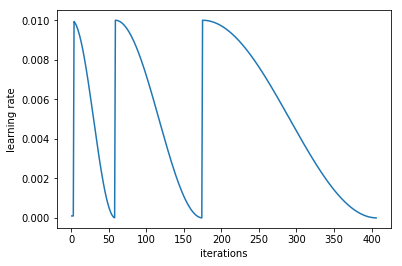

In [75]:
learn.sched.plot_lr()

In [76]:
learn.save('res50_flower_all')

In [77]:
learn.load('res50_flower_all')

In [78]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [81]:
log_preds = learn.predict()
y = data.val_y
preds = np.argmax(log_preds, axis=1)
probs = np.exp(log_preds)

In [82]:
accuracy_np(probs, y)

0.8443759630200308

In [92]:
cm = confusion_matrix(y, preds)

[[ 83  16   2   7   7]
 [  3 140   2   3  10]
 [  0   2  89   4  23]
 [  2   4   4  99   1]
 [  0   1   8   2 137]]


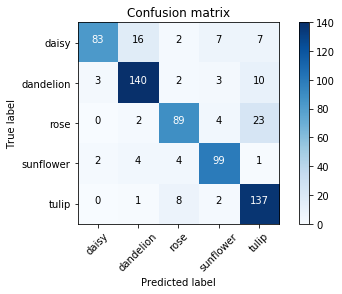

In [94]:
plot_confusion_matrix(cm, data.classes)

Most incorrect class daisy


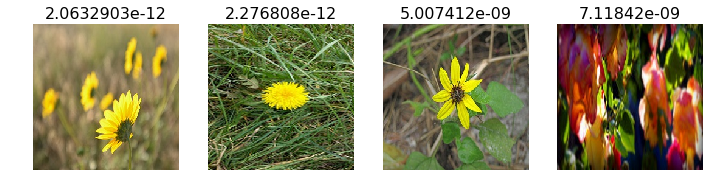

In [106]:
label = 0
plot_val_with_title(most_by_correct(label, False), "Most incorrect class daisy", label)

Most incorrect class dandelion


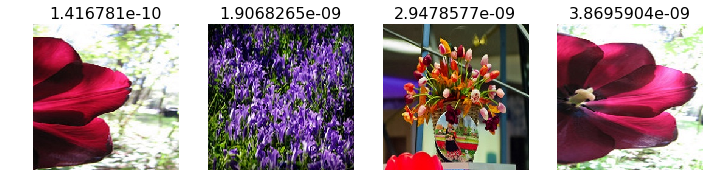

In [107]:
label = 1
plot_val_with_title(most_by_correct(label, False), "Most incorrect class dandelion", label)

Most incorrect class rose


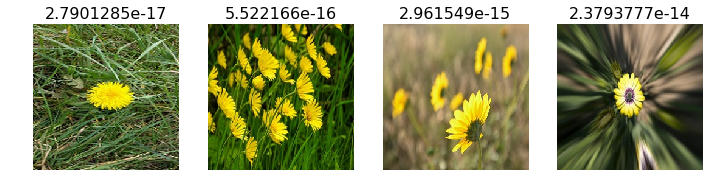

In [108]:
label = 2
plot_val_with_title(most_by_correct(label, False), "Most incorrect class rose", label)

Most incorrect class sunflower


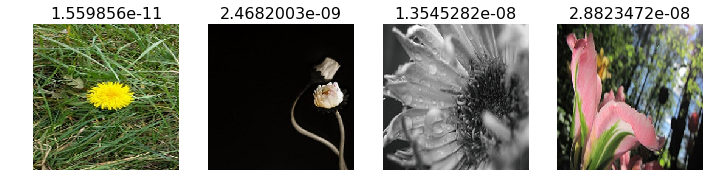

In [109]:
label = 3
plot_val_with_title(most_by_correct(label, False), "Most incorrect class sunflower", label)

Most incorrect class tulip


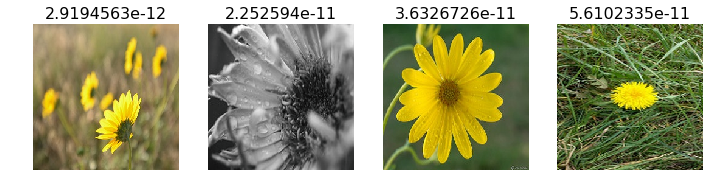

In [111]:
label = 4
plot_val_with_title(most_by_correct(label, False), "Most incorrect class tulip", label)

Most correct class daisy


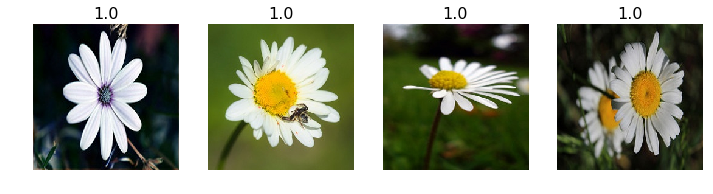

In [112]:
label = 0
plot_val_with_title(most_by_correct(label, True), "Most correct class daisy", label)

Most correct class dandelion


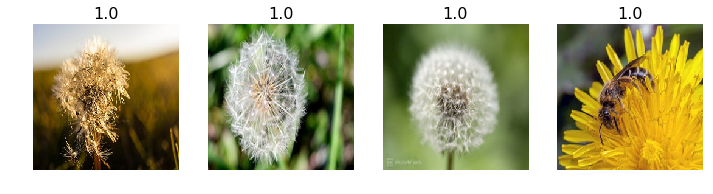

In [113]:
label = 1
plot_val_with_title(most_by_correct(label, True), "Most correct class dandelion", label)

Most correct class rose


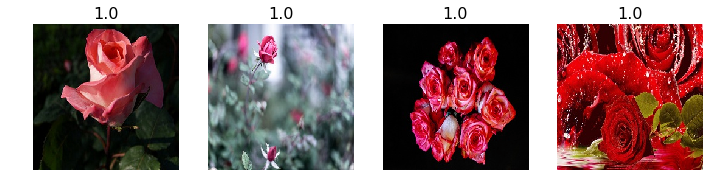

In [114]:
label = 2
plot_val_with_title(most_by_correct(label, True), "Most correct class rose", label)

Most correct class sunflower


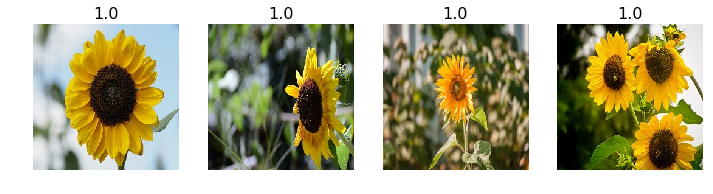

In [115]:
label = 3
plot_val_with_title(most_by_correct(label, True), "Most correct class sunflower", label)

Most correct class tulip


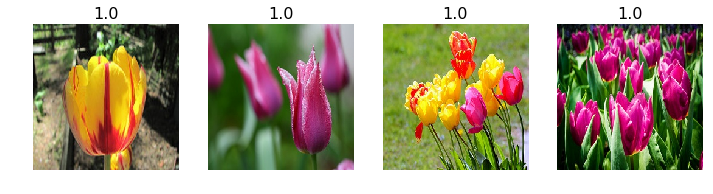

In [116]:
label = 4
plot_val_with_title(most_by_correct(label, True), "Most correct class tulip", label)